In [ ]:
## credentials contain:
consumer_key        = "..."
consumer_secret     = "..."
access_token        = "..."
access_token_secret = "..."
from credentials import *
import tweepy
# print(tweepy.__version__)

In [ ]:
userID = input("Please Enter Twitter Account handle: ")
# Authorize our Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
try:
    tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )
except tweepy.TweepError as e:
        print (e)
        print (type(e))
        print (e.__dict__)
        print (e.reason)
        print (type(e.reason))

Please Enter Twitter Account handle: @BarackObama


In [ ]:
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

N of tweets downloaded till now 371
N of tweets downloaded till now 557
N of tweets downloaded till now 736
N of tweets downloaded till now 909
N of tweets downloaded till now 1095
N of tweets downloaded till now 1272
N of tweets downloaded till now 1444
N of tweets downloaded till now 1617
N of tweets downloaded till now 1778
N of tweets downloaded till now 1950
N of tweets downloaded till now 2127
N of tweets downloaded till now 2313
N of tweets downloaded till now 2494
N of tweets downloaded till now 2674
N of tweets downloaded till now 2855
N of tweets downloaded till now 2897


In [ ]:
from pandas import DataFrame
outtweets = [[tweet.full_text.encode("utf-8").decode("utf-8")] 
             for idx,tweet in enumerate(all_tweets)]
df = DataFrame(outtweets,columns=["text"])
df.head(10)

,text
0,Libraries are citadels of knowledge and empath...
1,Our progress on the journey to equality someti...
2,"As a dad of two daughters, this movie really h..."
3,Congratulations to the @CripCampFilm team on t...
4,"By telling her story, Natoma Canfield helped u..."
5,The Senate is preparing to take action on a bi...
6,I’m really proud of young men like James and L...
7,"Now that Juneteenth is a federal holiday, take..."
8,"On Monday, I’m joining @EricHolder for a grass..."
9,And because he extended the special enrollment...


In [ ]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup


C:\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
df['text'].apply(lambda x: len(x.split(' '))).sum()

60942

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', '', text)
    text = text.replace("|||"," ")
    text=text.lower()
    text = re.sub(r"http\S+", "", text, flags=re.MULTILINE)
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [ ]:
df['text'] = df['text'].apply(clean_text)

In [ ]:
df.head(10)

,text
0,libraries citadels knowledge empathyand theyve...
1,progress journey equality sometimes feels like...
2,dad two daughters movie really hit home im gla...
3,congratulations cripcampfilm team peabodyaward...
4,telling story natoma canfield helped us pass a...
5,senate preparing take action bill would streng...
6,im really proud young men like james lazarus d...
7,juneteenth federal holiday take minute learn o...
8,monday im joining ericholder grassroots conver...
9,extended special enrollment period august 15th...


In [ ]:
df['text'].apply(lambda x: len(x.split(' '))).sum()

34208

In [ ]:
df.to_csv('%s_tweets.csv' % userID,index=False)


In [ ]:
import csv
with open('%s_tweets.csv' % userID,'rt') as f:
    csvReader=csv.reader(f)
    tweetList=[rows[0] for rows in csvReader]
os.remove('%s_tweets.csv' % userID)

In [ ]:
import pickle
vectorizer=TfidfVectorizer(sublinear_tf=True,decode_error="replace",vocabulary=pickle.load(open("feature.pkl", "rb")))

In [ ]:

# vectorizer=TfidfVectorizer(sublinear_tf=True)
x=vectorizer.fit_transform(tweetList).toarray()
df=pd.DataFrame(x)


In [ ]:
import pickle
with open('IE.sav', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin-1'
    model_IE = u.load()
#     print(p)
with open('NS.sav', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin-1'
    model_SN = u.load()
with open('TF.sav', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin-1'
    model_TF = u.load()
with open('JP.sav', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin-1'
    model_PJ = u.load()

In [ ]:
answer=[]
IE=model_IE.predict(df)
SN=model_SN.predict(df)
TF=model_TF.predict(df)
PJ=model_PJ.predict(df)

In [ ]:
l=[]
from collections import Counter
b = Counter(IE)
value=b.most_common(1)
# print(value)
if value[0][0] == 0:
    answer.append("I")
    l.append("I-Introversion")
else:
    answer.append("E")
    l.append("E-Extroversion")


b = Counter(SN)
value=b.most_common(1)
# print(value)
if value[0][0] == 1.0:
    answer.append("S")
    l.append("S-Sensing")
else:
    answer.append("N")
    l.append("N-Intuition")

b = Counter(TF)
value=b.most_common(1)
# print(value)
if value[0][0] == 0:
    answer.append("T")
    l.append("T-Thinking")
else:
    answer.append("F")
    l.append("F-Feeling")

b = Counter(PJ)
value=b.most_common(1)
# print(value)
if value[0][0] == 1:
    answer.append("P")
    l.append("P-Perceiving")
else:
    answer.append("J")
    l.append("J-Judging")
mbti="".join(answer)
print(mbti)


INTP


In [ ]:
if mbti=='ISTJ':
    dec='Quiet, serious, earn success by thoroughness and dependability. Practical, matter-of-fact, realistic, and responsible. Decide logically what should be done and work toward it steadily, regardless of distractions. Take pleasure in making everything orderly and organized - their work, their home, their life. Value traditions and loyalty.'
elif mbti=='ISFJ':
    dec='Quiet, friendly, responsible, and conscientious. Committed and steady in meeting their obligations. Thorough, painstaking, and accurate. Loyal, considerate, notice and remember specifics about people who are important to them, concerned with how others feel. Strive to create an orderly and harmonious environment at work and at home.'
elif mbti=='INFJ':
    dec='Seek meaning and connection in ideas, relationships, and material possessions. Want to understand what motivates people and are insightful about others. Conscientious and committed to their firm values. Develop a clear vision about how best to serve the common good. Organized and decisive in implementing their vision.'
elif mbti=='INTJ':
    dec='Have original minds and great drive for implementing their ideas and achieving their goals. Quickly see patterns in external events and develop long-range explanatory perspectives. When committed, organize a job and carry it through. Skeptical and independent, have high standards of competence and performance - for themselves and others.'
elif mbti=='ISTP':
    dec='Tolerant and flexible, quiet observers until a problem appears, then act quickly to find workable solutions. Analyze what makes things work and readily get through large amounts of data to isolate the core of practical problems. Interested in cause and effect, organize facts using logical principles, value efficiency.'
elif mbti=='ISFP':
    dec='Quiet, friendly, sensitive, and kind. Enjoy the present moment, whats going on around them. Like to have their own space and to work within their own time frame. Loyal and committed to their values and to people who are important to them. Dislike disagreements and conflicts, do not force their opinions or values on others.'
elif mbti=='INFP':
    dec='Idealistic, loyal to their values and to people who are important to them. Want an external life that is congruent with their values. Curious, quick to see possibilities, can be catalysts for implementing ideas. Seek to understand people and to help them fulfill their potential. Adaptable, flexible, and accepting unless a value is threatened.'
elif mbti=='INTP':
    dec='Seek to develop logical explanations for everything that interests them. Theoretical and abstract, interested more in ideas than in social interaction. Quiet, contained, flexible, and adaptable. Have unusual ability to focus in depth to solve problems in their area of interest. Skeptical, sometimes critical, always analytical.'
elif mbti=='ESTP':
    dec='Flexible and tolerant, they take a pragmatic approach focused on immediate results. Theories and conceptual explanations bore them - they want to act energetically to solve the problem. Focus on the here-and-now, spontaneous, enjoy each moment that they can be active with others. Enjoy material comforts and style. Learn best through doing.'
elif mbti=='ESFP':
    dec='Outgoing, friendly, and accepting. Exuberant lovers of life, people, and material comforts. Enjoy working with others to make things happen. Bring common sense and a realistic approach to their work, and make work fun. Flexible and spontaneous, adapt readily to new people and environments. Learn best by trying a new skill with other people.'
elif mbti=='ENFP':
    dec='Warmly enthusiastic and imaginative. See life as full of possibilities. Make connections between events and information very quickly, and confidently proceed based on the patterns they see. Want a lot of affirmation from others, and readily give appreciation and support. Spontaneous and flexible, often rely on their ability to improvise and their verbal fluency.'
elif mbti=='ENTP':
    dec='Quick, ingenious, stimulating, alert, and outspoken. Resourceful in solving new and challenging problems. Adept at generating conceptual possibilities and then analyzing them strategically. Good at reading other people. Bored by routine, will seldom do the same thing the same way, apt to turn to one new interest after another.'
elif mbti=='ESTJ':
    dec='Practical, realistic, matter-of-fact. Decisive, quickly move to implement decisions. Organize projects and people to get things done, focus on getting results in the most efficient way possible. Take care of routine details. Have a clear set of logical standards, systematically follow them and want others to also. Forceful in implementing their plans.'
elif mbti=='ESFJ':
    dec='Warmhearted, conscientious, and cooperative. Want harmony in their environment, work with determination to establish it. Like to work with others to complete tasks accurately and on time. Loyal, follow through even in small matters. Notice what others need in their day-by-day lives and try to provide it. Want to be appreciated for who they are and for what they contribute.'
elif mbti=='ENFJ':
    dec='Warm, empathetic, responsive, and responsible. Highly attuned to the emotions, needs, and motivations of others. Find potential in everyone, want to help others fulfill their potential. May act as catalysts for individual and group growth. Loyal, responsive to praise and criticism. Sociable, facilitate others in a group, and provide inspiring leadership.'
elif mbti=='ENTJ':
    dec='Frank, decisive, assume leadership readily. Quickly see illogical and inefficient procedures and policies, develop and implement comprehensive systems to solve organizational problems. Enjoy long-term planning and goal setting. Usually well informed, well read, enjoy expanding their knowledge and passing it on to others. Forceful in presenting their ideas.'

In [ ]:
print(userID)
print('Personality type is: ',mbti)
print("\n".join(l))
print()
print(dec)

@BarackObama
Personality type is:  INTP
I-Introversion
N-Intuition
T-Thinking
P-Perceiving

Seek to develop logical explanations for everything that interests them. Theoretical and abstract, interested more in ideas than in social interaction. Quiet, contained, flexible, and adaptable. Have unusual ability to focus in depth to solve problems in their area of interest. Skeptical, sometimes critical, always analytical.


(-0.5, 399.5, 199.5, -0.5)

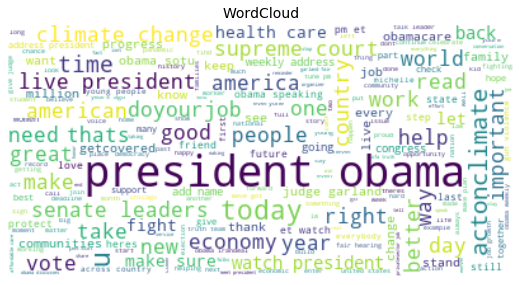

In [ ]:
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize

text = str(tweetList)
stopwords = set(STOPWORDS)
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords]
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords)

text = (" ").join(tokens_without_sw)


# generate word cloud
wc.generate(text)

# show
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(wc.recolor(), interpolation="bilinear")
plt.title('WordCloud', loc='Center', fontsize=14)
plt.axis("off")

In [ ]:
print(vectorizer.vocabulary)

{'enfp': 35286, 'and': 11531, 'intj': 52221, 'moments': 64415, 'sportscenter': 89952, 'not': 68224, 'top': 96762, 'ten': 94598, 'plays': 74421, 'pranks': 75669, 'what': 103859, 'has': 46112, 'been': 16094, 'the': 95111, 'most': 64928, 'life': 58136, 'changing': 21880, 'experience': 37380, 'in': 50332, 'your': 106935, 'on': 69691, 'repeat': 80631, 'for': 40407, 'of': 69225, 'today': 96475, 'may': 61651, 'perc': 72784, 'immerse': 50014, 'you': 106881, 'last': 57128, 'thing': 95551, 'my': 65800, 'infj': 51006, 'friend': 41161, 'posted': 75374, 'his': 47591, 'facebook': 37917, 'before': 16133, 'committing': 24399, 'suicide': 92213, 'next': 67274, 'day': 28450, 'rest': 81058, 'peace': 72405, 'hello': 46856, 'enfj7': 35265, 'sorry': 89088, 'to': 96425, 'hear': 46486, 'distress': 31571, 'it': 53065, 'only': 69773, 'natural': 66465, 'relationship': 80258, 'be': 15845, 'perfection': 72879, 'all': 10727, 'time': 96144, 'every': 36778, 'moment': 64406, 'existence': 37255, 'try': 97996, 'figure': 